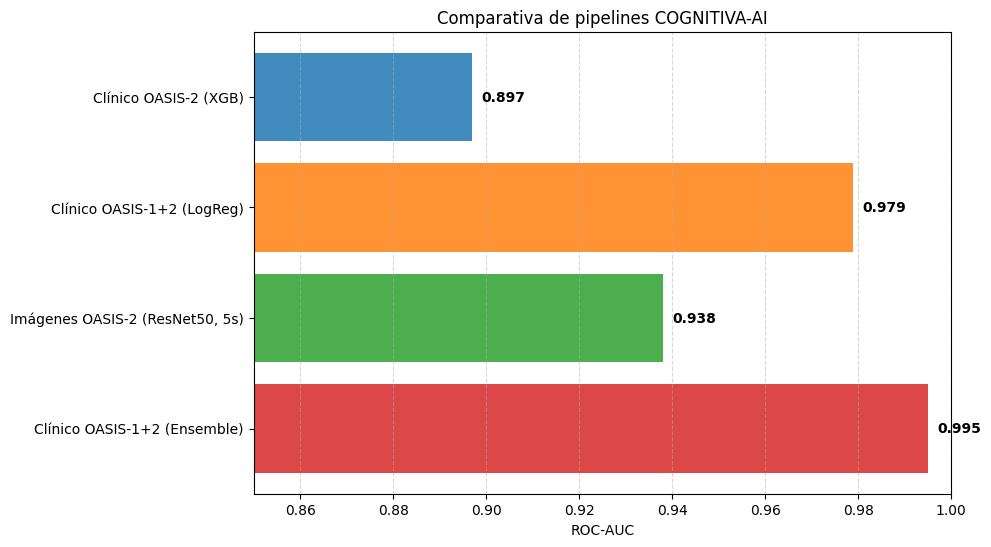

In [1]:
import matplotlib.pyplot as plt

labels = ["Clínico OASIS-2 (XGB)", 
          "Clínico OASIS-1+2 (LogReg)", 
          "Imágenes OASIS-2 (ResNet50, 5s)", 
          "Clínico OASIS-1+2 (Ensemble)"]

aucs = [0.897, 0.979, 0.938, 0.995]

colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]

plt.figure(figsize=(9,6))
bars = plt.barh(labels, aucs, color=colors, alpha=0.85)
plt.xlabel("ROC-AUC")
plt.title("Comparativa de pipelines COGNITIVA-AI")
plt.xlim(0.85,1.0)

# Anotar valores
for bar, auc in zip(bars, aucs):
    plt.text(bar.get_width()+0.002, bar.get_y()+bar.get_height()/2, f"{auc:.3f}",
             va='center', fontsize=10, fontweight="bold")

plt.gca().invert_yaxis()
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.show()


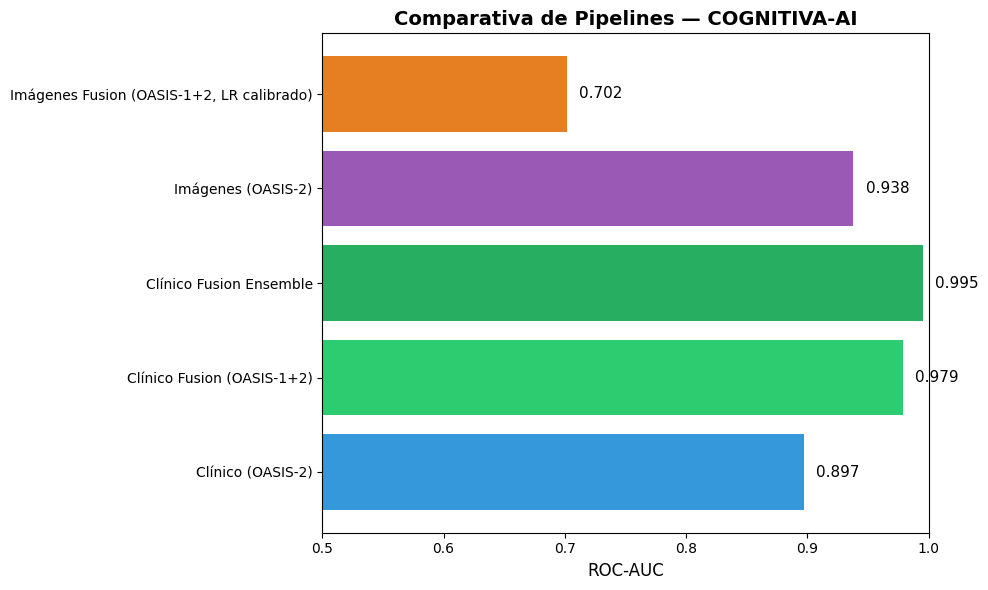

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

# Crear directorio de salida si no existe
os.makedirs("graficos", exist_ok=True)

# Datos actualizados
pipelines = [
    "Clínico (OASIS-2)",
    "Clínico Fusion (OASIS-1+2)",
    "Clínico Fusion Ensemble",
    "Imágenes (OASIS-2)",
    "Imágenes Fusion (OASIS-1+2, LR calibrado)"
]

auc_scores = [
    0.897,   # XGBoost OASIS-2
    0.979,   # LogReg OASIS-1+2
    0.995,   # Ensemble OASIS-1+2
    0.938,   # ResNet50 (5 slices OASIS-2)
    0.702    # Mejor test AUC a nivel paciente (OAS1 embeddings + LR calibrado)
]

colors = [
    "#3498db",  # azul
    "#2ecc71",  # verde
    "#27ae60",  # verde oscuro
    "#9b59b6",  # violeta
    "#e67e22"   # naranja
]

plt.figure(figsize=(10,6))
bars = plt.barh(pipelines, auc_scores, color=colors)
plt.xlabel("ROC-AUC", fontsize=12)
plt.title("Comparativa de Pipelines — COGNITIVA-AI", fontsize=14, weight="bold")
plt.xlim(0.5, 1.0)

# Etiquetas con valores
for bar, score in zip(bars, auc_scores):
    plt.text(score+0.01, bar.get_y() + bar.get_height()/2,
             f"{score:.3f}", va="center", fontsize=11)

plt.tight_layout()
plt.savefig("graficos/comparativa.png", dpi=150)
plt.show()


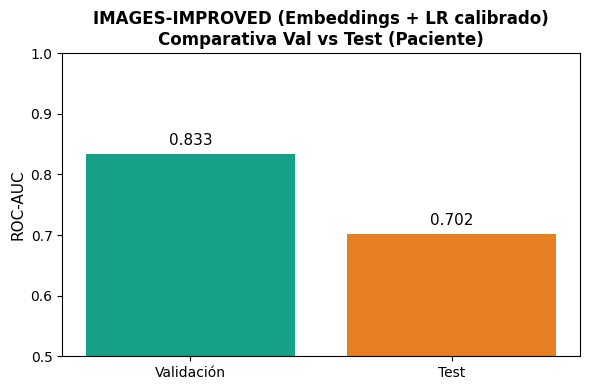

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os

os.makedirs("graficos", exist_ok=True)

# Métricas paciente-nivel (IMAGES-IMPROVED con embeddings + LR calibrado)
auc_val  = 0.833
auc_test = 0.702

labels = ["Validación", "Test"]
values = [auc_val, auc_test]
colors = ["#16a085", "#e67e22"]  # verde azulado y naranja (coherentes con la paleta anterior)

plt.figure(figsize=(6, 4))
bars = plt.bar(labels, values, color=colors)
plt.ylim(0.5, 1.0)
plt.ylabel("ROC-AUC", fontsize=11)
plt.title("IMAGES-IMPROVED (Embeddings + LR calibrado)\nComparativa Val vs Test (Paciente)", fontsize=12, weight="bold")

for bar, score in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, score + 0.01, f"{score:.3f}",
             ha="center", va="bottom", fontsize=11)

plt.tight_layout()
plt.savefig("graficos/comparativa_images_improved_val_test_auc.png", dpi=150)
plt.show()


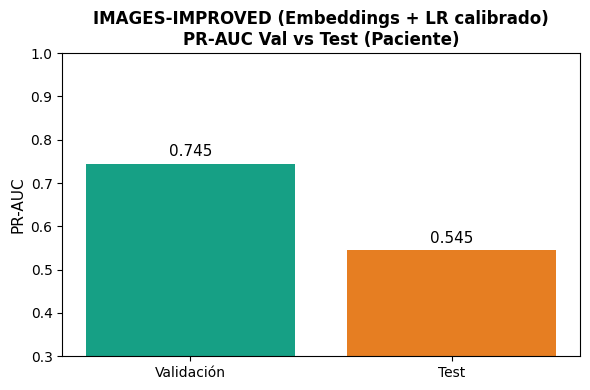

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os

os.makedirs("graficos", exist_ok=True)

# PR-AUC paciente-nivel
prauc_val  = 0.745
prauc_test = 0.545

labels = ["Validación", "Test"]
values = [prauc_val, prauc_test]
colors = ["#16a085", "#e67e22"]

plt.figure(figsize=(6, 4))
bars = plt.bar(labels, values, color=colors)
plt.ylim(0.3, 1.0)
plt.ylabel("PR-AUC", fontsize=11)
plt.title("IMAGES-IMPROVED (Embeddings + LR calibrado)\nPR-AUC Val vs Test (Paciente)", fontsize=12, weight="bold")

for bar, score in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, score + 0.01, f"{score:.3f}",
             ha="center", va="bottom", fontsize=11)

plt.tight_layout()
plt.savefig("graficos/comparativa_images_improved_val_test_prauc.png", dpi=150)
plt.show()


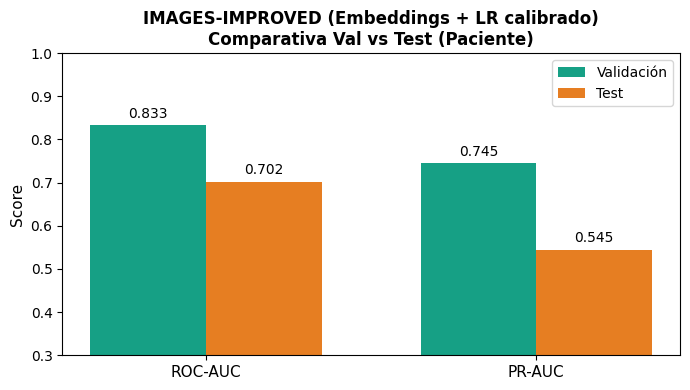

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os

os.makedirs("graficos", exist_ok=True)

# Métricas paciente-nivel (IMAGES-IMPROVED, embeddings + LR calibrado)
auc_val,  auc_test  = 0.833, 0.702
prauc_val, prauc_test = 0.745, 0.545

metrics = ["ROC-AUC", "PR-AUC"]
val_scores  = [auc_val,  prauc_val]
test_scores = [auc_test, prauc_test]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(7, 4))
bars1 = plt.bar(x - width/2, val_scores,  width, label="Validación", color="#16a085")
bars2 = plt.bar(x + width/2, test_scores, width, label="Test",       color="#e67e22")

plt.xticks(x, metrics, fontsize=11)
plt.ylabel("Score", fontsize=11)
plt.ylim(0.3, 1.0)
plt.title("IMAGES-IMPROVED (Embeddings + LR calibrado)\nComparativa Val vs Test (Paciente)", fontsize=12, weight="bold")
plt.legend()

for bars in (bars1, bars2):
    for b in bars:
        h = b.get_height()
        plt.text(b.get_x() + b.get_width()/2, h + 0.01, f"{h:.3f}",
                 ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.savefig("graficos/comparativa_images_improved_auc_prauc.png", dpi=150)
plt.show()
